# Estadística Bayesiana
    
      Marlijar Hurtado Moreno - Jhon Sebastián Vela Salcedo.

___

In [20]:
# Importanto librerias
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import minimize_scalar as minimize
import random

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

___

### I - Introducción a la Estadística Bayesiana

**Ejercicio**

1. Escriba un programa Python que imite el experimento ilustrado. Pero ahora suponga que la moneda es sesgada. Por ejemplo, suponga que $\mu=0.7$

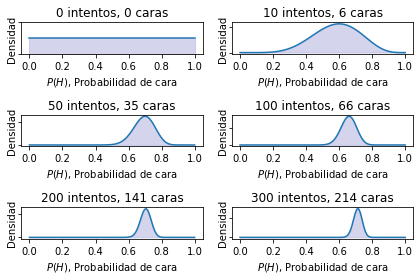

In [2]:
if __name__ == "__main__":
    numero_de_intentos = [0, 10, 50, 100, 200, 300]
    data = stats.bernoulli.rvs(0.7, size=numero_de_intentos[-1])
x = np.linspace(0, 1, 100)
for i, N in enumerate(numero_de_intentos):
        caras = data[0:N].sum()
        
        ax = plt.subplot(len(numero_de_intentos) / 2, 2, i + 1)
        ax.set_title("%s intentos, %s caras" % (N, caras))
        
        plt.xlabel("$P(H)$, Probabilidad de cara")
        plt.ylabel("Densidad")
        if i == 0:
            plt.ylim([0.0, 2.0])
        plt.setp(ax.get_yticklabels(), visible=False)
        
        y = stats.beta.pdf(x, 1 + caras, 1 + N - caras)
        plt.plot(x, y, label="observe %d tosses,\n %d caras" % (N, caras))
        plt.fill_between(x, 0, y, color="#aaaadd", alpha=0.5)
        
plt.tight_layout()
plt.show()

2. $\leadsto$ Discuta estos resultados con sus compañeros

*En la medida en que la muestra aumenta, los datos van a tener menor varianza, por lo cual se van acercando a un valor fijo. En este caso es 0,7 porque la moneta está sesgada, y tiene una probabilidad a caer más caras que sellos.*

### Tarea
Narración de los datos
Para nuestra primera tarea usaremos un globo terraqueo a escala.

1. El experimento consiste en hacer girar el globo y pinchar en algun lugar sin tener ninguna preferencia. El experimento es de tipo dicotómico, debido a que solamente habra dos posibles resultados: agua (1) o tierra (0).

2. La probabilidad de pinchar en agua corresponde al valor verdadero de la proporción de agua y se denotará $\mu$.

3. La probabilidad de pinchar en tierra corresponde al valor verdadero de la proporción de tierra y es $ 1-\mu$.
4. Cada experimento es independiente de los demás.

5. Repita el proceso de actualización de la posterior en descrito en esta lección. Use Python y elabore algunos gráficos similares.

3


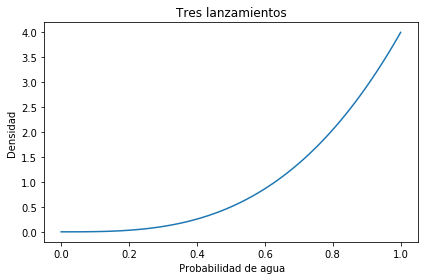

4


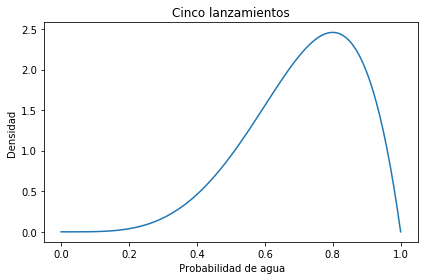

9


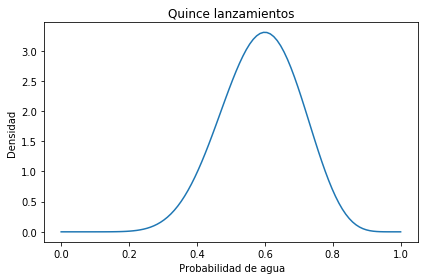

37


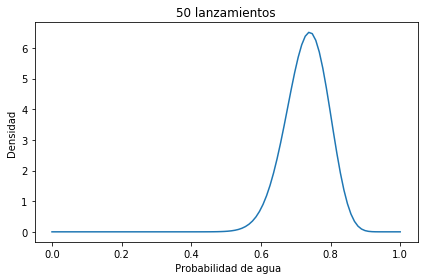

158


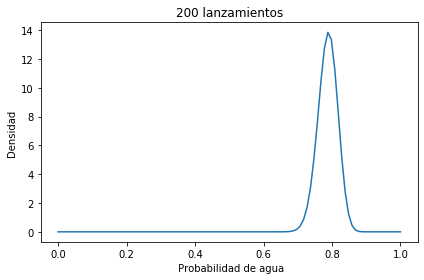

In [3]:
from scipy.stats import bernoulli

#3 pinchazos utilizando la probabilidad  de que agua sea 0.75
data=stats.bernoulli.rvs(p=0.75, size=3)
x = np.linspace(0, 1, 100)       
agua=data[:N].sum()
print(agua)
plt.xlabel(" Probabilidad de agua")
plt.ylabel("Densidad")
y=stats.beta.pdf(x, 1 + agua, 1 + 3 - agua)
plt.plot(x, y)
plt.title('Tres lanzamientos')
plt.tight_layout()
plt.show()
 
#5 pinchazos utilizando la probabilidad  de que agua sea 0.75
        
data=stats.bernoulli.rvs(p=0.75, size=5)
x = np.linspace(0, 1, 100)       
agua=data[:N].sum()
print(agua)
plt.xlabel(" Probabilidad de agua")
plt.ylabel("Densidad")
y=stats.beta.pdf(x, 1 + agua, 1 + 5 - agua)
plt.plot(x, y)
plt.title('Cinco lanzamientos')
plt.tight_layout()
plt.show()

#15 pinchazos  

data=stats.bernoulli.rvs(p=0.75, size=15)
x = np.linspace(0, 1, 100)       
agua=data[:N].sum()
print(agua)
plt.xlabel(" Probabilidad de agua")
plt.ylabel("Densidad")
y=stats.beta.pdf(x, 1 + agua, 1 + 15 - agua)
plt.plot(x, y)
plt.title('Quince lanzamientos')
plt.tight_layout()
plt.show()

#50 pinchazos 
data=stats.bernoulli.rvs(p=0.75, size=50)
x = np.linspace(0, 1, 100)       
agua=data[:N].sum()
print(agua)
plt.xlabel(" Probabilidad de agua")
plt.ylabel("Densidad")
y=stats.beta.pdf(x, 1 + agua, 1 + 50 - agua)
plt.plot(x, y)
plt.title('50 lanzamientos')
plt.tight_layout()
plt.show()


#200 pinchazos modificando la probabilidad según el resultado anterior 
data=stats.bernoulli.rvs(p=0.75, size=200)
x = np.linspace(0, 1, 100)       
agua=data[:N].sum()
print(agua)
plt.xlabel(" Probabilidad de agua")
plt.ylabel("Densidad")
y=stats.beta.pdf(x, 1 + agua, 1 + 200 - agua)
plt.plot(x, y)
plt.title('200 lanzamientos')
plt.tight_layout()
plt.show()




### II - La Estrategia Bayesiana

**Tarea**

Use geomaps o una simulación  y realice una estimación más precisa para el problema de esta lección.

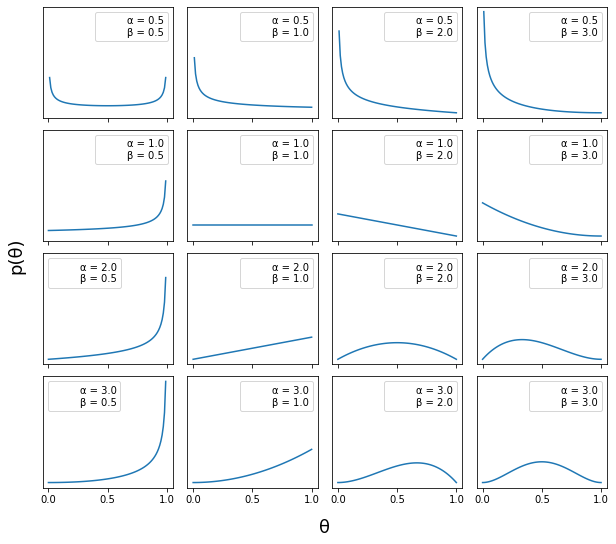

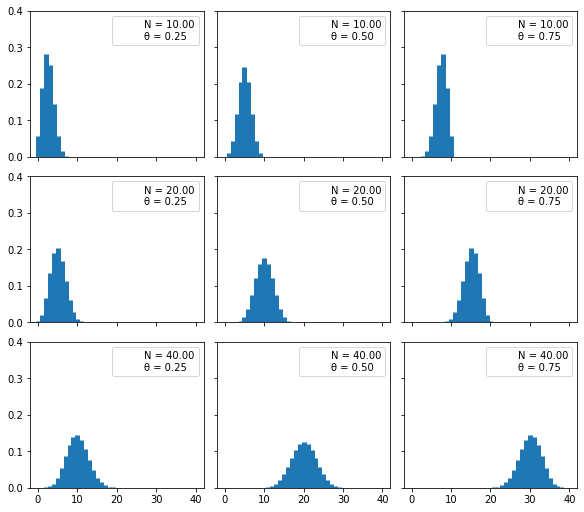

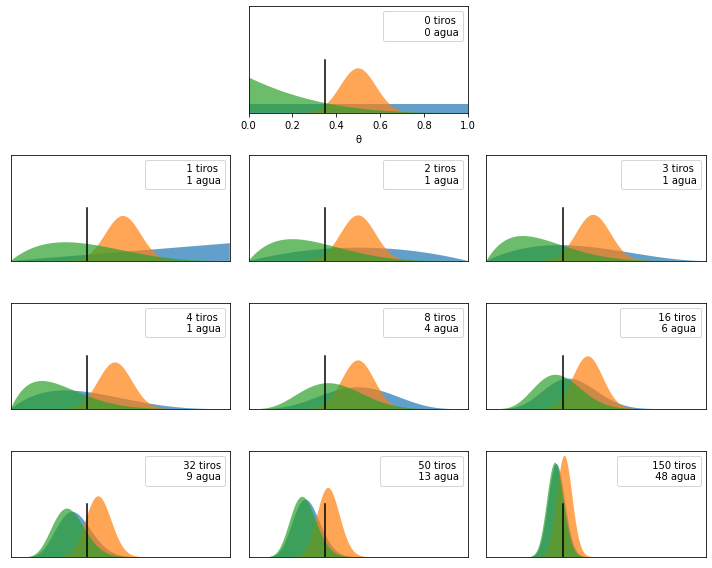

In [4]:
# Prior - Beta
params = [0.5, 1, 2, 3]

x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True, figsize=(8, 7), constrained_layout=True)
for i in range(len(params)):
    for j in range(len(params)):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="α = {:2.1f}\nβ = {:2.1f}".format(a,b), alpha=0)
        ax[i,j].legend()
ax[1,0].set_yticks([])
ax[1,0].set_xticks([0, 0.5, 1])
f.text(0.5, -0.05, 'θ', ha='center', fontsize=18)
f.text(-0.05, 0.5, 'p(θ)', va='center', rotation=90, fontsize=18)


# Likelihood - Binomial

n_params = [10, 20, 40] # veces que cayó agua
p_params = [0.25, 0.5, 0.75] # probabilidad del suceso

x = np.arange(0, max(n_params)+1)
f,ax = plt.subplots(len(n_params), len(p_params), sharex=True, sharey=True, figsize=(8, 7), constrained_layout=True)
for i in range(len(n_params)):
    for j in range(len(p_params)):
        n = n_params[i]
        p = p_params[j]
        y = stats.binom(n=n, p=p).pmf(x)
        ax[i,j].vlines(x, 0, y, colors='C0', lw=5)
        ax[i,j].set_ylim(0, 0.4)
        ax[i,j].plot(0, 0, label="N = {:3.2f}\nθ = {:3.2f}".format(n,p), alpha=0)
        ax[i,j].legend()

 # Posterior - (Likelihood*Prior)/(Marginal Likelihood)
plt.figure(figsize=(10, 8))

n_tiros = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (20, 20), (1, 4)]   #(Prior), (likelihood), (posterior)
dist = stats.beta
x = np.linspace(0, 1, 200)

for idx, N in enumerate(n_tiros):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.7)
    
    plt.axvline(theta_real, ymax=0.5, color='k')
    plt.plot(0, 0, label=f'{N:4d} tiros\n{y:4d} agua', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()

___

### IV - El efecto del tamaño de muestra

**Tarea**

**1. Se hicieron 4 experimentos Binomiales para estimar el porcentaje de agua superficial en la tierra. Los cuatro experimentos dieron lso siguientes resultados:**

| n | w | 
|---|---|
|20|15|
|50|38|
|100|70|
|500|362|

Haga las 4 estimaciones Bayesianas de $\mu$.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.optimize import minimize_scalar as minimize
#utilizando los alpha y beta de la clase
alpha1=1.5
beta1=1.2
n1=6
w1=3
def f(n1,alpha1,beta1):
    return  -stats.beta(alpha1,beta1).pdf(n1)

lower = 1e-3
upper = 1  - 1e-3 
mode_f = minimize(f, bounds =(lower,upper),args=(w1+alpha1,n1-w1+beta1), method='bounded' )

mode_f

     fun: -2.2889702216912178
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: 0.5223877133169147

In [6]:

#1.b.
n2=10
w2=6
def f(n2,alpha1,beta1):
    return  -stats.beta(alpha1,beta1).pdf(n2)

lower = 1e-3
upper = 1  - 1e-3 
mode_f = minimize(f, bounds =(lower,upper),args=(w2+alpha1,n2-w2+beta1), method='bounded' )

mode_f

     fun: -2.8505156362159867
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: 0.607477735745656

In [7]:
#los del correo
#1.c 
n3=20
w3=15
def f(n3,alpha1,beta1):
    return  -stats.beta(alpha1,beta1).pdf(n3)

lower = 1e-3
upper = 1  - 1e-3 
mode_f = minimize(f, bounds =(lower,upper),args=(w3+alpha1,n3-w3+beta1), method='bounded' )

mode_f



     fun: -4.3117118956961145
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: 0.7487923105165191

In [8]:

#1.d
n4=50
w4=38
def f(n4,alpha1,beta1):
    return  -stats.beta(alpha1,beta1).pdf(n4)

lower = 1e-3
upper = 1  - 1e-3 
mode_f = minimize(f, bounds =(lower,upper),args=(w4+alpha1,n4-w4+beta1), method='bounded' )

mode_f

     fun: -6.726703577424074
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: 0.7593683910530646

In [9]:

#1.e
n5=100
w5=70
def f(n5,alpha1,beta1):
    return  -stats.beta(alpha1,beta1).pdf(n5)

lower = 1e-3
upper = 1  - 1e-3 
mode_f = minimize(f, bounds =(lower,upper),args=(w5+alpha1,n5-w5+beta1), method='bounded' )

mode_f

     fun: -8.796206809580628
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 0.7000993224592101

In [10]:

#1.f
n5=500
w5=362
def f(n5,alpha1,beta1):
    return  -stats.beta(alpha1,beta1).pdf(n5)

lower = 1e-3
upper = 1  - 1e-3 
mode_f = minimize(f, bounds =(lower,upper),args=(w5+alpha1,n5-w5+beta1), method='bounded' )

mode_f

     fun: -19.9961093873131
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 0.7239864265179499

___

**2. Se observó el número de autos de color azul que pasan por la carrera 30 con 45, durante 20 minutos. Los datos reportados son por minuto.**

    3 5 3 4 2 4 6 2 3 5 4 2 3 3 4 3 4 4 5 3

    Haga la estimación Bayesiana del número promedio de autos por minuto, usando un modelo de Poisson.

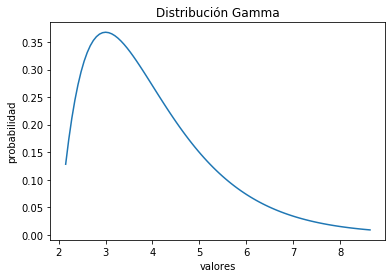

[2.96610324]
72
[85.43626749]


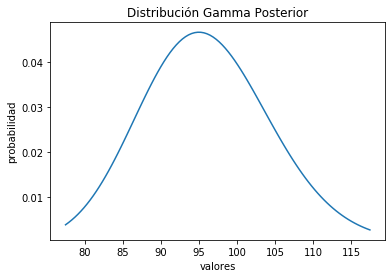

3.3636363636363638


In [11]:
# 2. MODELO POISSON-GAMMA
# Suponemos estos parámetros
#apriori
L = 5000
np.random.seed(L)

a=2
beta=0.5
v=1/beta
gamma = stats.gamma(a,v)
x = np.linspace(gamma.ppf(0.01),
                gamma.ppf(0.99), 100)
fp = gamma.pdf(x) 
plt.plot(x, fp)
plt.title('Distribución Gamma')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()


lamda = stats.gamma(a,v).rvs(1)
print(lamda)
#posterior
n=20
y = np.array([3, 5, 3, 4,2, 4, 6, 2, 3, 5, 4, 2, 3, 3, 4, 3, 4, 4, 5, 3])
sumatoriay=sum(y)
print(sumatoriay)

apost=sumatoriay+a
vpost=n+v

lamdapost = stats.gamma(apost,vpost).rvs(1)
print(lamdapost)

gammapost = stats.gamma(apost,vpost)
x = np.linspace(gammapost.ppf(0.01),
                gammapost.ppf(0.99), 100)
fp = gammapost.pdf(x) 
plt.plot(x, fp)
plt.title('Distribución Gamma Posterior')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()


mediay= y.mean()
EAP= ((n*mediay)/(n+v))+(((v/(n+v))*(a/v)))
print(EAP)


#El promedio de autos por minuto es de 3.36


___

**3. Los datos son la mediciones del diámetro de la cabeza de un tornillo en un proceso de producción. Se sabe que la desviación estándard de las observaciones es 1. Haga la estimación Bayesiana del tamaño promedio del tornillo usando un modelo lineal Gaussiano.**

14.05143 16.18481 14.41038 16.46475 16.68658 16.22363 15.33024 
13.87497 16.10362 15.94356

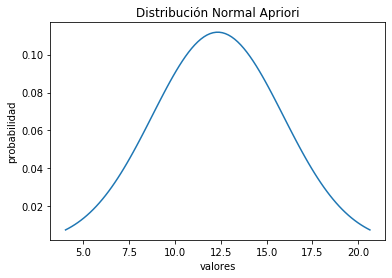

[10.04386215]
15.527396999999999
[15.31870759]


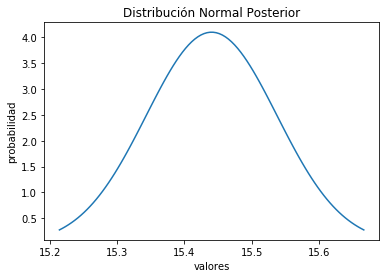

15.440475892827923


In [12]:
# 2. MODELO  Gaussiano-Gausisiano
# Suponemos estos parámetros
#apriori
L = 5000
np.random.seed(L)

mo=12.34
t2=3.567

normal = stats.norm(mo, t2)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x)
plt.plot(x, fp)
plt.title('Distribución Normal Apriori')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

theta= stats.norm(mo, t2).rvs(1)
print(theta)
#posterior
n=10
y = np.array([14.05143, 16.18481, 14.41038, 16.46475, 16.68658, 16.22363, 15.33024,13.87497, 16.10362, 15.94356])
mediay=y.mean()
print(mediay)

sigma2=1
m=((sigma2*mo)+(n*t2*mediay))/(sigma2+(n*t2))
s=(sigma2*t2)/(sigma2+(n*t2))

thetaposterior= stats.norm(m,s).rvs(1)
print(thetaposterior)

normalpost = stats.norm(m,s)
x = np.linspace(normalpost.ppf(0.01),
                normalpost.ppf(0.99), 100)
fp = normalpost.pdf(x) 
plt.plot(x, fp)
plt.title('Distribución Normal Posterior')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()


k=(sigma2/(sigma2+(n*t2)))
EAP= (k*mo)+((1-k)*mediay)
print(EAP)


#El promedio de autos por minuto es de 3.36

___

### V - Interpretación de la Esperanza Posterior (EAP)

**Tarea**

1. Consiga unos datos, para cada uno de los modelos Poisson , Binomial y Normal. Consulte cualquier libro de inferencia estadística. Proponga distribuciones a priori para los parámetros. En el caso normal, asuma que $\sigma^2$ es conocida.
2. Calcule las estimaciones Bayesianas puntuales y de intervalo en cada caso. Presente sus resultados en una tabla.
3. Escriba en cada caso la EAP como promedio ponderado de la media a priori y la estimación máximo verosímil en cada caso.
4. Haga las gráficas que consider conveniente.
5. Repita los puntos 1 a 4, con datos generados por simulación.

___

<h2><font color="Blue">Modelo Poisson</font></h2>

___

<h2><font color="Blue">Modelo Binomial</font></h2>

____

<h2><font color="Blue">Modelo Normal</font></h2>

**Datos**

En este modelo usamos los datos suministrados por el ICFES sobre .[el examen Saber Pro - 2018 agregado.](https://github.com/SebastianVela/EstadisticaBayesiana/blob/master/SaberPro2018.xlsx)
Analizaremos el examen especifico del examen Saber Pro para el grupo de referencía de Economía a nivel nacional por cedes universitarias.
    

In [13]:
import pandas as pd

data=pd.ExcelFile("C:/Users/sebas/OneDrive/UniversidadNacional/programacion/EstadisticaBayesiana/SaberPro2018.xlsx")
df=data.parse('Programa Academico')
print(df.columns)

Index(['GRUPO_REFERENCIA', 'MUNICIPIO_INSTITUCION', 'DEPARTAMENTO_INSTITUCION',
       'ID_INSTITUCION', 'INSTITUCION', 'ORIGEN', 'CARACTER', 'SNIES',
       'MUNICIPIO_PROGRAMAACADEMICO', 'DEPARTAMENTO_PROGRAMAACADEMICO',
       'PROGRAMA_ACADEMICO', 'NOMBRE_MODULO', 'TOTAL_EVALGRUPO_INSTPROGRAMA',
       'PROMEDIO_PUNTAJEGLOBAL', 'DESVI_ESTANDAR_PUNTAJEGLOBAL',
       'PROMEDIO_PUNTAJEPRUEBA', 'DESVI_ESTANDAR_PUNTAJEPRUEBA'],
      dtype='object')


In [24]:
df.iloc[:,[0,4,10,-2,-1]]

,GRUPO_REFERENCIA,INSTITUCION,PROGRAMA_ACADEMICO,PROMEDIO_PUNTAJEPRUEBA,DESVI_ESTANDAR_PUNTAJEPRUEBA
0,ADMINISTRACIÓN Y AFINES,COLEGIO DE ESTUDIOS SUPERIORES DE ADMINISTRACI...,ADMINISTRACION DE EMPRESAS,190,26
1,ADMINISTRACIÓN Y AFINES,COLEGIO DE ESTUDIOS SUPERIORES DE ADMINISTRACI...,ADMINISTRACION DE EMPRESAS,181,24
2,ADMINISTRACIÓN Y AFINES,COLEGIO DE ESTUDIOS SUPERIORES DE ADMINISTRACI...,ADMINISTRACION DE EMPRESAS,191,27
3,ADMINISTRACIÓN Y AFINES,COLEGIO MAYOR DE ANTIOQUIA-MEDELLIN,ADMINISTRACION DE EMPRESAS TURISTICAS,154,28
4,ADMINISTRACIÓN Y AFINES,COLEGIO MAYOR DE ANTIOQUIA-MEDELLIN,ADMINISTRACION DE EMPRESAS TURISTICAS,143,32
...,...,...,...,...,...
7393,SALUD,UNIVERSIDAD SIMON BOLIVAR-BARRANQUILLA,FISIOTERAPIA,139,22
7394,SALUD,UNIVERSIDAD SIMON BOLIVAR-BARRANQUILLA,INTRUMENTACION QUIRURGICA,136,26
7395,SALUD,UNIVERSIDAD SIMON BOLIVAR-BARRANQUILLA,INTRUMENTACION QUIRURGICA,148,24
7396,SALUD,UNIVERSIDAD-COLEGIO MAYOR DE CUNDINAMARCA-BOGO...,BACTERIOLOGIA Y LABORATORIO CLINICO,160,21


In [15]:
economia=df.loc[df["GRUPO_REFERENCIA"]=="ECONOMÍA",["INSTITUCION","PROMEDIO_PUNTAJEPRUEBA"]]
economia.head()

,INSTITUCION,PROMEDIO_PUNTAJEPRUEBA
3064,COLEGIO MAYOR DE NUESTRA SEÑORA DEL ROSARIO-BO...,173
3065,COLEGIO MAYOR DE NUESTRA SEÑORA DEL ROSARIO-BO...,152
3066,CORPORACION UNIVERSIDAD PILOTO DE COLOMBIA-BOG...,129
3067,CORPORACION UNIVERSITARIA DE ASTURIAS-BOGOTÁ D.C.,116
3068,CORPORACION UNIVERSITARIA DEL CARIBE - CECAR-S...,101


### -- Modelo

El **promedio del puntaje de la prueba** es una muestra de una población normal $\bar{\mathbf{y}} \sim \mathcal{N}(\theta,\sigma^2)$, en donde $\sigma^2$ es conocida. Entonces, el parámetro de interés es $\theta$, el cual se va a distribuir $\theta\sim\mathcal{N}(\mu_0,\tau^2)$.

$$
\begin{align*}
 \text{A priori: } &p(\theta) = \mathcal{N}(\mu_0,\tau^2)\\
 \text{Verosimilitud: }  &p(\bar{\mathbf{y}}|\theta) = \mathcal{N}(\theta,\sigma^2/n)\\
 \text{Posterior: } &p(\theta|\bar{\mathbf{y}}) = \mathcal{N}\left(\frac{\sigma^2 \mu_0 + n\tau^2 \bar{\mathbf{y}}}{\sigma^2 + n\tau^2},\frac{\sigma^2\tau^2}{\sigma^2+ n\tau^2}  \right)\\
\end{align*}
$$

In [46]:
from scipy import stats
import numpy as np

stats.describe(economia["PROMEDIO_PUNTAJEPRUEBA"])

PROMEDIO_PUNTAJEPRUEBA=economia["PROMEDIO_PUNTAJEPRUEBA"]

DescribeResult(nobs=72, minmax=(101, 180), mean=140.13888888888889, variance=305.0508607198748, skewness=0.18624780433891344, kurtosis=-0.6692842691988461)

(0, 0.12)

140.789290478555
3.957373052616264


Text(0.5, 0, '$\\theta$')

Text(0, 0.5, '$p(\\theta)$')

Text(0.5, 0.98, 'Gráficos de la pdf a priori y posterior para el parametro $\\theta$')

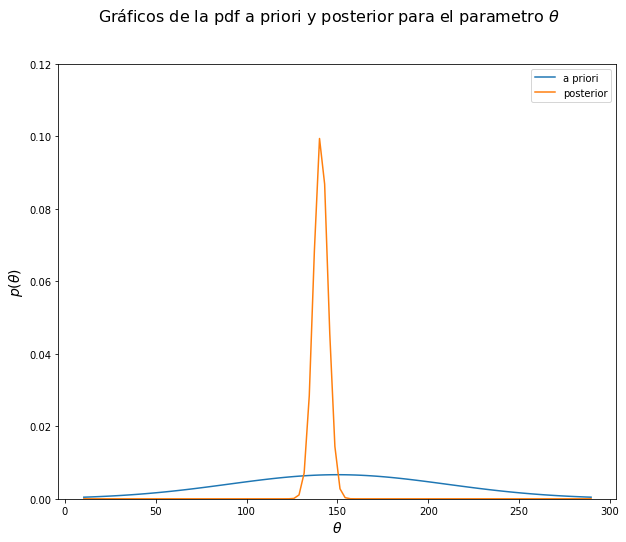

In [62]:
#apriori

mo=150
t2=30*2

x = np.linspace(normal.ppf(0.01),normal.ppf(0.99), 100)
fig, ax =fig, ax=plt.subplots(figsize=(10,8))
ax.set_ylim(0,0.12)

y = stats.norm(mo, t2).pdf(x)
ax.plot(x,y,label = 'a priori')

#posterior
n=72
media_prueba=PROMEDIO_PUNTAJEPRUEBA.mean()

sigma2=305.0508607198748
m=((sigma2*mo)+(n*t2*media_prueba))/(sigma2+(n*t2))
print(m)
s=(sigma2*t2)/(sigma2+(n*t2))
print(s)
y = stats.norm(m,s).pdf(x)

ax.plot(x,y,label = 'posterior')
ax.set_xlabel('$\\theta$', fontsize=14)
ax.set_ylabel('$p(\\theta)$', fontsize=14)
fig.suptitle('Gráficos de la pdf a priori y posterior para el parametro $\\theta$',fontsize=16)
ax.legend()
plt.show()


### Estimación puntual para $\theta$

***La moda de la distribución posterior: MAP.***

In [71]:
def f(x,m,s):
    return  -stats.norm(m,s).pdf(x)

lower = 1e-3
upper = 300 
mode_f = minimize(f, bounds =(lower,upper),args=(140.789290478555,3.957373052616264), method='bounded' )

In [72]:
mode_f

     fun: -0.10080987440333962
 message: 'Solution found.'
    nfev: 15
  status: 0
 success: True
       x: 140.78929191952744

***La mediana de la distribución posterior: MEAP.***

In [65]:
MEAP=stats.norm(m,s).median()

In [66]:
MEAP

140.789290478555

***La media (esperanza) a posterior: EAP.***

In [67]:
EAP=stats.norm(m,s).mean()

In [68]:
EAP

140.789290478555

Cualquiera de los 3 estimadores, MAP, MEAP, EAP, es bueno para estimar a $\theta$ debido a que los 3 son practicamente iguales.

### Estimación por intervalos para $\theta$

In [76]:
i_cred_80 = stats.norm(m,s).ppf((0.1,0.9))
i_cred_95 = stats.norm(m,s).ppf((0.025,0.975))
i_cred_99 = stats.norm(m,s).ppf((0.005,0.995))
print(i_cred_80,"\n",i_cred_95,"\n",i_cred_99)

[135.71771285 145.86086811] 
 [133.03298182 148.54559914] 
 [130.595773   150.98280795]


Intervalos de credibilidad

|Credibilidad|Lim Inferior|Lim Superior|
|----|----|----|
|80%|135.7177 |145.8608|
|95%|133.0329 |148.5455|
|99%|130.5957 |150.9828|

___

### VII - Primer ejemplo en Stan: eight schools

**Tarea**

Reescriba la tarea del (EAP_Interpretación de la esperanza posterior) utilizando Stan y lo aprendido en este cuaderno.

___